<a href="https://colab.research.google.com/github/YawarRizwan/Machine_Learning/blob/main-(projects)/Detecting_Fake_News_using_Tfidf_vectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OBJECTIVE : Detecting accurately whether a news is FAKE or not using Machine Learning 

In this exercise, we will be creating a model that can predict Fake News from a corpus. We will use the simple Term Frequency Inverse Document Frequency Vectorizer (Tfidf vectorizer), and Passive Agrressive Classifier. In other advanced NLP focused problems later, we will use Word2Vec, BERT etc.  

### Import the libraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# Load the data
df = pd.read_csv('news.csv')

### Basic data exploration 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [6]:
df.shape

(6335, 4)

In [7]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [8]:
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
labels = df['label']
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


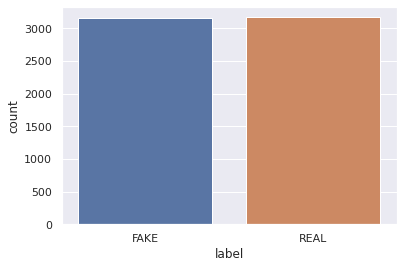

In [26]:
# the dataset is already balanced.
sns.countplot(labels)

### Importing the metrics to gauge model's performance

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix 
x_train,x_test,y_train,y_test = train_test_split(df['text'], labels, test_size=0.15, random_state=42)

## [Tfidf Vectorizer](https://https://monkeylearn.com/blog/what-is-tf-idf/)

## How is TF-IDF calculated?
TF-IDF for a word in a document is calculated by multiplying two different metrics:

###The term frequency
 of a word in a document. There are several ways of calculating this frequency, with the simplest being a raw count of instances a word appears in a document. Then, there are ways to adjust the frequency, by length of a document, or by the raw frequency of the most frequent word in a document.

###The inverse document frequency 
of the word across a set of documents. This means, how common or rare a word is in the entire document set. The closer it is to 0, the more common a word is. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.

So, if the word is very common and appears in many documents, this number will approach 0. Otherwise, it will approach 1.
Multiplying these two numbers results in the TF-IDF score of a word in a document. The higher the score, the more relevant that word is in that particular document.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

In [12]:
# Initialize a TFIDF vector
tfidf = TfidfVectorizer(stop_words = 'english',max_df = 0.6)

# Fit and transform train set, transform test set
tfidf_train=tfidf.fit_transform(x_train) 
tfidf_test=tfidf.transform(x_test)

### [Passive Aggressive Classifier](https://https://www.geeksforgeeks.org/passive-aggressive-classifiers/)

Passive-Aggressive algorithms are somewhat similar to a Perceptron model, in the sense that they do not require a learning rate. However, they do include a regularization parameter.

#### How Passive-Aggressive Algorithms Work:
Passive-Aggressive algorithms are called so because :

#### Passive: 
If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 
####Aggressive: 
If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

In [13]:
# Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,y_train)

# Predict on the test set and calculate accuracy
y_pred= pac.predict(tfidf_test)
score= accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.69%


### Metrics Evaluation

Our model predicts with 94% accuracy!

In [14]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix, precision_score

# Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[431,  28],
       [ 32, 460]])

In [15]:
precision_score(y_test, y_pred, average='macro')

0.9367542399886698

In [16]:
precision_score(y_test, y_pred, average='micro')

0.9369085173501577

In [17]:
precision_score(y_test, y_pred, average='weighted')

0.936957886105834

In [22]:
precision_score(y_test, y_pred, average=None)

array([0.93088553, 0.94262295])